# TP 4

### Par Mathieu Marquis, Charles-Antoine Parent et Thomas Piuze

In [1]:
import numpy as np
import scipy as sp
import graphinglib as gl
import networkx as nx
from typing import Callable

import warnings
warnings.simplefilter("ignore")

## 4.1 : Int√©gration num√©rique de la dynamique √©pid√©miologique SIS

### **a)** Identifiez les deux √©tats stationnaires $0 \leq i^*_{1,2} \leq 1$ pour lesquels $\frac{di}{d\tau} = 0$, de m√™me que les conditions sur $R_0$ pour lesquelles ces √©tats stationnaires sont possibles (s‚Äôil y a lieu).

√Ä partir de l'√©quation suivante:
$$ \frac{di}{d\tau} = (R_0-1)i-R_0i^2, $$
nous pouvons identifier les deux √©tats stationnaires:
$$ \begin{align*}
    0 &= (R_0-1)i-R_0i^2 \\
    0 &= i(R_0-1-R_0i) \\
    i &= \begin{cases}
            0 \\
            \frac{R_0-1}{R_0}
        \end{cases}
    \end{align*} $$
Un premier √©tat stationnaire se produit pour $i^*_1=0$, ce qui est logique, car en l'absence d'individus infect√©s, la maladie ne peut se propager. Un deuxi√®me cas, moins intuitif, se produit pour $i^*_2=\frac{R_0-1}{R_0}$. Le premier cas n'implique aucune condition sur $R_0$. En revanche, le deuxi√®me cas restreint les valeurs possibles de $R_0$, car nous devons avoir $0 \leq i^*_2 \leq 1$. Puisque $R_0=\beta/\alpha$, et que $\alpha,\beta>0$, $R_0$ est toujours positif. Nous avons donc:
$$ \begin{align*}
        0 &\leq \frac{R_0-1}{R_0} \leq 1 \\
        0 &\leq R_0-1 \leq R_0 \\
        1 &\leq R_0 \leq R_0+1
    \end{align*} $$
La condition $R_0 \leq R_0+1$ est redondante. Cependant, la condition $R_0 \geq 1$ est plus restrictive, car elle n√©cessite que $\beta \geq \alpha$.

### **b)** Obtenez une solution analytique $i(\tau)$ (valide pour $i \geq 0$). Vous noterez $i(0) = i_0$. Indice : Il s‚Äôagit d‚Äôune EDO de Bernouilli.

L'EDO de Bernouilli √† r√©soudre est:
$$ \frac{di}{d\tau} = (R_0-1)i-R_0i^2 $$
Multiplions cette √©quation par $-1/i^2$:
$$ -\frac{1}{i^2}\frac{di}{d\tau} = \frac{(1-R_0)}{i}+R_0 $$ 
Posons ensuite le changement de variable $u=\frac{1}{i}$, de telle sorte que:
$$ u = \frac{1}{i} \longrightarrow \frac{du}{d\tau} = \frac{du}{di}\frac{di}{d\tau} = -\frac{1}{i^2}\frac{di}{d\tau} $$
L'√©quation √† r√©soudre devient alors:
$$ \frac{du}{d\tau} = (1-R_0)u+R_0 $$
Soit une √©quation diff√©rentielle ordinaire lin√©aire du premier ordre. La forme g√©n√©rale d'une telle √©quation est:
$$ y'(x)+p(x)y(x) = q(x) $$
Dont la solution g√©n√©rale est donn√©e par:
$$ y(x) = e^{-\int p(x)dx}\left(\int e^{\int p(x)dx}q(x)dx+C\right) $$
O√π $C$ est une constante d√©termin√©e par la condition initiale. Dans notre cas, $x=\tau$, $y(x)=u(\tau)$, $y'(x)=\frac{du(\tau)}{d\tau}$, $p(x)=(R_0-1)$ et $q(x)=R_0$. La solution est donc:
$$ \begin{align*}
        u(\tau) &= e^{-\int (R_0-1)d\tau}\left(\int e^{\int (R_0-1)d\tau}R_0d\tau+C\right) \\
        &= e^{-(R_0-1)\tau}\left(\int R_0e^{(R_0-1)\tau}d\tau+C\right) \\
        &= e^{-(R_0-1)\tau}\left(\frac{R_0}{R_0-1}e^{(R_0-1)\tau}+C\right) \\
        &= Ce^{-(R_0-1)\tau}+\frac{R_0}{R_0-1}
    \end{align*} $$
Nous sommes conscients que pour les int√©grales effectu√©es, certaines constantes d'int√©gration ont √©t√© n√©glig√©es. Elles n'affectent toutefois pas la forme finale de la solution, qui reste parfaitement valide. Puisque $i(0)=i_0$, $u(0)=\frac{1}{i(0)}=\frac{1}{i_0}$ :
$$ u(0) = C+\frac{R_0}{R_0-1} = \frac{1}{i_0} \longrightarrow C = \frac{1}{i_0}-\frac{R_0}{R_0-1} $$
Donc:
$$ \begin{align*}
        u(\tau) &= \left(\frac{1}{i_0}-\frac{R_0}{R_0-1}\right)e^{-(R_0-1)\tau}+\frac{R_0}{R_0-1} \\
        i(\tau) &= \frac{1}{u(\tau)} \\
        i(\tau) &= \frac{1}{\left(\frac{1}{i_0}-\frac{R_0}{R_0-1}\right)e^{-(R_0-1)\tau}+\frac{R_0}{R_0-1}} \\
        i(\tau) &= \frac{i_0(R_0-1)}{\left(R_0(1-i_0)-1\right)e^{-(R_0-1)\tau}+R_0i_0}
    \end{align*} $$
Soit la solution recherch√©e.

### **c)** Impl√©mentez les int√©grateurs d‚ÄôEuler, de Runge-Kutta d‚Äôordre 2 et de Runge-Kutta d‚Äôordre 4. Vos fonctions devront retourner les trajectoires compos√©es des fractions de la population infect√©e $\{i_s\}_{s=0,...,T}$ et des temps $\{\tau_s\}_{s=0,...,T}$ auxquels ces fractions correspondent. La valeur de $T$ sera fix√©e ci-dessous.

Le code suivant implante la solution analytique, l'√©quation diff√©rentielle de m√™me que les trois int√©grateurs. La solution analytique de m√™me que les trois solutions obtenues avec les int√©grateurs sont ensuite pour $\tau\in[0,10]$, $h=0.01$, $i_0=0.8$ et $R_0=0.1$.

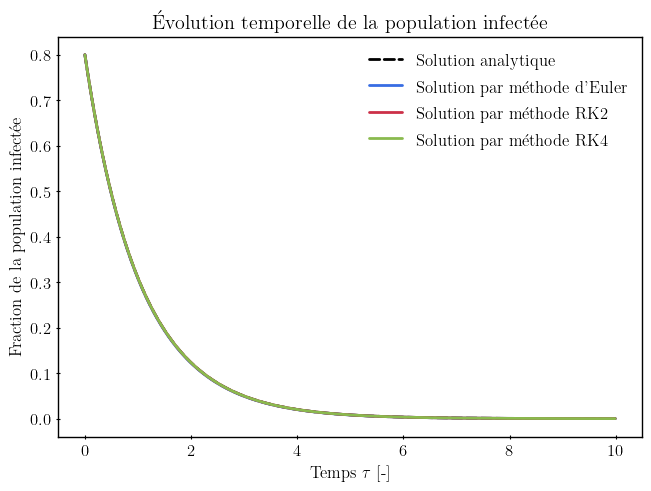

In [2]:
def sol_analytique(t: float, i_0: float, R_0: float) -> float:
    """
    Solution analytique de l'√©quation diff√©rentielle ordinaire.
    """
    return i_0*(R_0-1)/((R_0*(1-i_0)-1)*np.e**(-(R_0-1)*t)+R_0*i_0)

def f(i: float, t: float, R_0: float) -> float:
    """
    Fonction repr√©sentant l'√©quation diff√©rentielle ordinaire.
    """
    return (R_0 - 1)*i - R_0 * i**2

def euler(func: Callable, a: float, b:float, h:float, x0: float, *init_params) -> tuple[np.ndarray, np.ndarray]:
    """
    M√©thode d'Euler pour r√©soudre une √©quation diff√©rentielle ordinaire.
    
    Param√®tres
    ----------
    func (Callable) : Fonction repr√©sentant l'√©quation diff√©rentielle.
    a (float) : Param√®tre initial.
    b (float) : Param√®tre final.
    h (float) : Pas de temps.
    x0 (float) : Valeur initiale de la solution.
    init_params : Param√®tres initiaux suppl√©mentaires pour la fonction.

    Retourne
    -------
    tpoints (np.ndarray) : Points de temps.
    xpoints (np.ndarray) : Valeurs de la solution √† chaque point de temps.
    """
    tpoints = np.arange(a, b, h)
    xpoints = np.zeros_like(tpoints)
    x = x0
    for i, t in enumerate(tpoints):
        xpoints[i] = x
        x += h * func(x, t, *init_params)
    return tpoints, xpoints

def rk2(func: Callable, a: float, b:float, h:float, x0: float, *init_params) -> tuple[np.ndarray, np.ndarray]:
    """
    M√©thode de Runge-Kutta d'ordre 2 pour r√©soudre une √©quation diff√©rentielle ordinaire.
    
    Param√®tres
    ----------
    func (Callable) : Fonction repr√©sentant l'√©quation diff√©rentielle.
    a (float) : Param√®tre initial.
    b (float) : Param√®tre final.
    h (float) : Pas de temps.
    x0 (float) : Valeur initiale de la solution.
    init_params : Param√®tres initiaux suppl√©mentaires pour la fonction.

    Retourne
    -------
    tpoints (np.ndarray) : Points de temps.
    xpoints (np.ndarray) : Valeurs de la solution √† chaque point de temps.
    """
    tpoints = np.arange(a, b, h)
    xpoints = np.zeros_like(tpoints)
    x = x0
    for i, t in enumerate(tpoints):
        xpoints[i] = x
        k1 = func(x, t, *init_params)
        k2 = func(x + h * k1 / 2, t + h / 2, *init_params)
        x += h * k2
    return tpoints, xpoints

def rk4(func: Callable, a: float, b:float, h:float, x0: float, *init_params) -> tuple[np.ndarray, np.ndarray]:
    """
    M√©thode de Runge-Kutta d'ordre 4 pour r√©soudre une √©quation diff√©rentielle ordinaire.
    
    Param√®tres
    ----------
    func (Callable) : Fonction repr√©sentant l'√©quation diff√©rentielle.
    a (float) : Param√®tre initial.
    b (float) : Param√®tre final.
    h (float) : Pas de temps.
    x0 (float) : Valeur initiale de la solution.
    R_0 (float) : Nombre de reproduction de base.
    init_params : Param√®tres initiaux suppl√©mentaires pour la fonction.

    Retourne
    -------
    tpoints (np.ndarray) : Points de temps.
    xpoints (np.ndarray) : Valeurs de la solution √† chaque point de temps.
    """
    tpoints = np.arange(a, b, h)
    xpoints = np.zeros_like(tpoints)
    x = x0
    for i, t in enumerate(tpoints):
        xpoints[i] = x
        k1 = func(x, t, *init_params)
        k2 = func(x + h * k1 / 2, t + h / 2, *init_params)
        k3 = func(x + h * k2 / 2, t + h / 2, *init_params)
        k4 = func(x + h * k3, t + h, *init_params)
        x += (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return tpoints, xpoints


t, i = euler(f, 0, 10, 0.01, 0.8, 0.1)
fig = gl.Figure(r'Temps $\tau$ [-]', 'Fraction de la population infect√©e', 
                title='√âvolution temporelle de la population infect√©e')
fig.add_elements(
    gl.Curve(t, sol_analytique(t, 0.8, 0.1), label='Solution analytique', color='k', line_style='--'),
    gl.Curve(t, i, label="Solution par m√©thode d'Euler"),
    gl.Curve(t, rk2(f, 0, 10, 0.01, 0.8, 0.1)[1], label="Solution par m√©thode RK2"),
    gl.Curve(t, rk4(f, 0, 10, 0.01, 0.8, 0.1)[1], label="Solution par m√©thode RK4"),
)
fig.show()

Ce graphique permet de voir que les quatre solutions sont parfaitement superpos√©es. Cela constitue une confirmation suppl√©mentaire de la validit√© des m√©thodes implant√©es.

### **d)** Impl√©mentez la m√©thode du ratio dor√©e (ou un autre optimisateur de votre choix) qui vous permettra de trouver la longueur de pas $h$ permettant d‚Äôobtenir une erreur sur la trajectoire num√©rique $\varepsilon(h)$ born√©e par $(1\pm0.01)\delta$, o√π $\delta$ sera sp√©cifi√©e ci-dessous. L‚Äôerreur sera calcul√©e selon
$$ \varepsilon(h) = \sqrt{\frac{1}{T+1}\sum_{s=0}^T(i_s-i(\tau_s))^2}, $$
### o√π $i(\cdot)$ est la solution analytique obtenue en **b**. N‚Äôh√©sitez pas √† consid√©rer une m√©thode euristique pour bien cerner l‚Äôintervalle de d√©part pour $h$ fourni √† la m√©thode du ratio dor√©. √Ä l‚Äôaide de votre algorithme, identifiez une valeur de pas d‚Äôint√©gration $h$ permettant de limiter $\varepsilon(h)$ √† l‚Äôintervalle $[0.99\delta,1.01\delta]$ pour plusieurs valeurs de $\delta \in [10^{-9},10^{-6}]$, pour plusieurs couples $(i_0,R_0)$ et pour chacun des trois int√©grateurs impl√©ment√©s en **c**. Utilisez $T = 3$. Une fois les valeurs de $h$ obtenues, repr√©sentez quelques-unes des trajectoires sur un graphique (pour des fins de visualisation seulement).

Le code suivant implante une m√©thode pour calculer l'erreur, de m√™me qu'une m√©thode pour cerner l'intervalle de d√©part ad√©quat pour $h$ √† fournir √† la m√©thode du ratio dor√©. Les valeurs de $h$ obtenues pour 20 valeurs de $\delta$ entre $10^{-9}$ et $10^{-6}$ et pour trois couples $(i_0,R_0)$ sont ensuite illustr√©es pour les trois int√©grateurs.

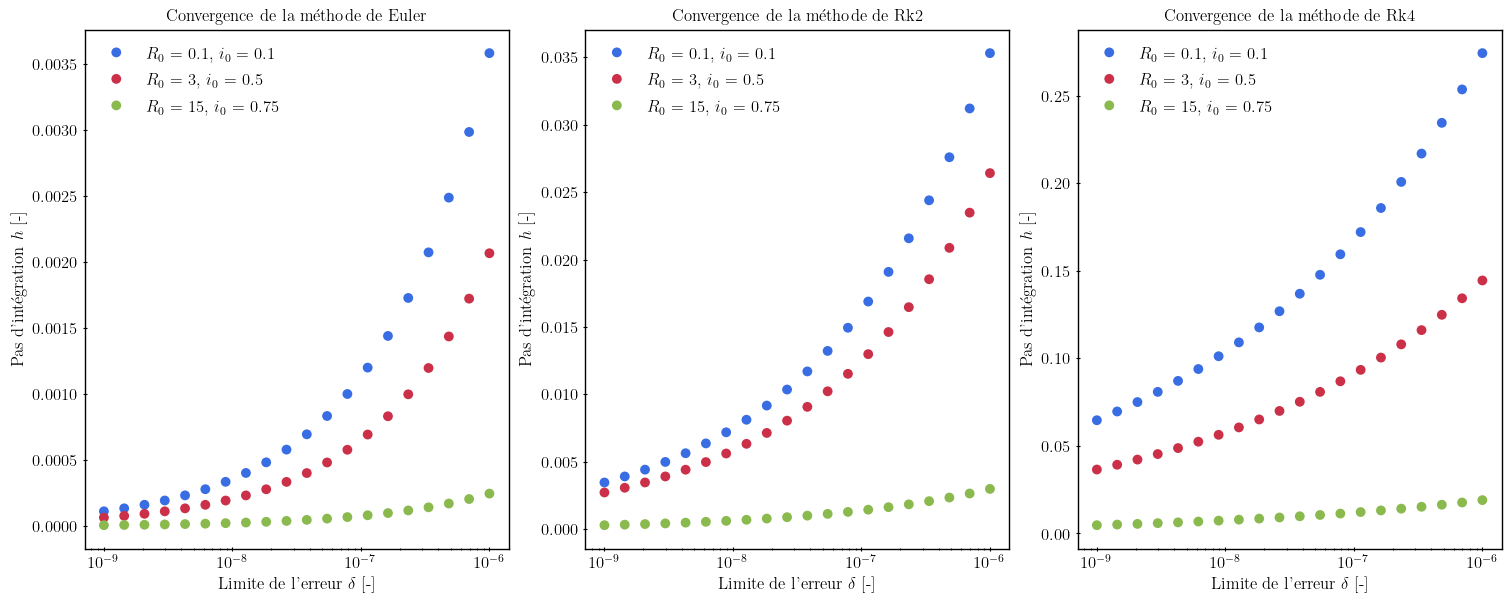

In [3]:
def epsilon(integrateur: Callable, h: float, i_0: float, R_0: float, T: float=3.0) -> float:
    """
    Calcule l'erreur entre la solution num√©rique et la solution analytique.

    Param√®tres
    ----------
    integrateur (Callable) : M√©thode d'int√©gration √† utiliser (Euler, RK2, RK4).
    h (float) : Pas de temps.
    i_0 (float) : Valeur initiale de la solution.
    R_0 (float) : Nombre de reproduction de base.
    T (float) : Temps final.

    Retourne
    --------
    float : Erreur entre la solution num√©rique et la solution analytique.
    """
    t_s, i_s = integrateur(f, 0, (T+1)*h, h, i_0, R_0)
    i_analytique = sol_analytique(t_s, i_0, R_0)
    sum_ = np.sum((i_s - i_analytique)**2)
    return np.sqrt(sum_ / (T + 1))

def trouver_bornes_h(integrateur: Callable, T: float, i_0: float, R_0: float, delta: float) -> tuple[float, float]:
    """
    Trouve les bornes inf√©rieure et sup√©rieure pour le pas de temps h correspondant aux bornes d'une erreur de
    [0.99ùõÖ,1.01ùõÖ].

    Param√®tres
    ----------
    integrateur (Callable) : M√©thode d'int√©gration √† utiliser (Euler, RK2, RK4).
    T (float) : Temps final.
    i_0 (float) : Valeur initiale de la solution.
    R_0 (float) : Nombre de reproduction de base.
    delta (float) : Erreur cible. La m√©thode renvoie les bornes pour une erreur de [0.99ùõÖ,1.01ùõÖ].

    Retourne
    --------
    tuple[float, float] : Bornes inf√©rieure et sup√©rieure pour le pas de temps h.
    """
    h_logspace = np.logspace(-6, 0, 1000)
    epsilon_vals = []
    for h in h_logspace:
        epsilon_vals.append(epsilon(integrateur, h, i_0, R_0, T))
    epsilon_vals = np.array(epsilon_vals)
    low_bound = h_logspace[np.where(epsilon_vals < 0.99 * delta)[0][-1]]
    high_bound = h_logspace[np.where(epsilon_vals > 1.01 * delta)[0][0]]
    return low_bound, high_bound

def ratio_dore(integrateur: Callable, delta: float, i_0: float, R_0: float, T: float=3.0, err=1e-8) -> float:
    """
    Trouve le pas de temps h correspondant √† une erreur epsilon proche de delta en utilisant la m√©thode du ratio dor√©.

    Param√®tres
    ----------
    integrateur (Callable) : M√©thode d'int√©gration √† utiliser (Euler, RK2, RK4).
    delta (float) : Erreur cible.
    i_0 (float) : Valeur initiale de la solution.
    R_0 (float) : Nombre de reproduction de base.
    T (float) : Temps final.
    err (float) : Erreur tol√©r√©e pour la convergence.

    Retourne
    --------
    float : Pas de temps h correspondant √† une erreur epsilon proche de delta.
    """
    def fonction(h: float) -> float:
        return np.abs(epsilon(integrateur, h, i_0, R_0, T) - delta)

    z = (1 + np.sqrt(5)) / 2

    x1, x4 = trouver_bornes_h(integrateur, T, i_0, R_0, delta)
    x2 = x4 - (x4 - x1) / z
    x3 = x1 + (x4 - x1) / z

    while (x4-x1) > err:
        if fonction(x2) < fonction(x3):
            x4, x3 = x3, x2
            x2 = x4 - (x4 - x1) / z
        else:
            x2, x1 = x3, x2
            x3 = x1 + (x4 - x1) / z
    
    return (x4 + x1) / 2

def visualiser_convergence(integrateur: Callable, i_0s: list, R_0s: list, deltas: np.ndarray) -> gl.Figure:
    """
    Visualise la convergence de la m√©thode d'int√©gration choisie en fonction de diff√©rents pas de temps.

    Param√®tres
    ----------
    integrateur (Callable) : M√©thode d'int√©gration √† utiliser (Euler, RK2, RK4).
    i_0s (list) : Liste des valeurs initiales de la solution.
    R_0s (list) : Liste des valeurs du nombre de reproduction de base.
    deltas (np.ndarray) : Liste des pas de temps.

    Retourne
    --------
    gl.Figure : Figure contenant les courbes de convergence.
    """
    hs = []
    for i in range(len(i_0s)):
        i_0, R_0 = i_0s[i], R_0s[i]
        h = []
        for d in deltas:
            h.append(ratio_dore(integrateur, d, i_0, R_0, T=3))
        hs.append(h)

    hs = np.array(hs)

    scatters = [gl.Scatter(deltas, hs[i], label=rf"$R_0$ = {ir[1]}, $i_0$ = {ir[0]}") 
                for i, ir in enumerate(zip(i_0s, R_0s))]

    # Visualisation de la convergence
    fig = gl.Figure(r"Limite de l'erreur $\delta$ [-]", r"Pas d'int√©gration $h$ [-]", 
                    title=f"Convergence de la m√©thode de {integrateur.__name__.capitalize()}", log_scale_x=True)
    fig.add_elements(
        *scatters
    )
    #fig.set_visual_params(use_latex=True)
    return fig

# Valeurs de delta
deltas = np.logspace(-9, -6, 20)

# Couples (i_0, R_0)
i_0s = [0.1, 0.5, 0.75]
R_0s = [0.1, 3, 15]

# Affichage de la figure
figs = []
methodes = [euler, rk2, rk4]
for integrateur in methodes:
    fig = visualiser_convergence(integrateur, i_0s, R_0s, deltas)
    figs.append(fig)

gl.MultiFigure.from_row(figs, size=(15, 6), reference_labels=False).show()

La m√©thode de Runge-Kutta d'ordre 2 n√©cessite des valeurs de $h$ environ 10 fois moins petites que la m√©thode d'Euler pour atteindre une pr√©cision similaire. De fa√ßon semblable, la m√©thode de Runge-Kutta d'ordre 4 permet d'accro√Ætre la valeur de $h$ d'un autre ordre de grandeur sans affecter la pr√©cision de la solution obtenue.

Nous pouvons ensuite repr√©senter quelques trajectoires obtenues pour diff√©rentes valeurs de $h$:

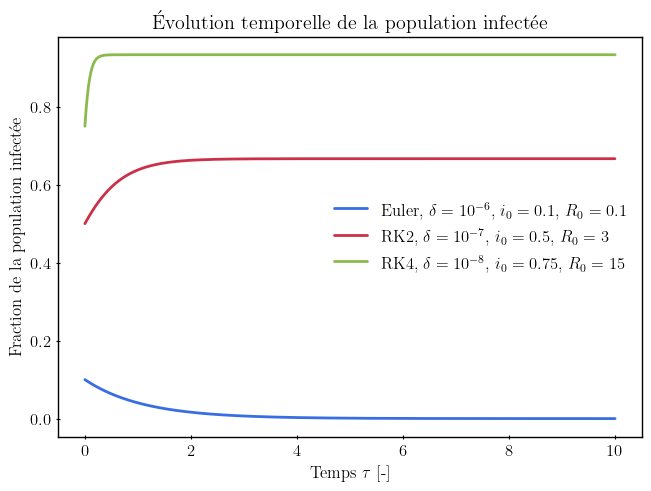

In [4]:
h_1 = ratio_dore(euler, 1e-6, 0.1, 0.1)
h_2 = ratio_dore(rk2, 1e-7, 0.5, 3)
h_3 = ratio_dore(rk4, 1e-8, 0.75, 15)

fig = gl.Figure(r'Temps $\tau$ [-]', 'Fraction de la population infect√©e',
                title='√âvolution temporelle de la population infect√©e')
fig.add_elements(
    gl.Curve(*euler(f, 0, 10, h_1, 0.1, 0.1), label=r"Euler, $\delta=10^{-6}$, $i_0=0.1$, $R_0=0.1$"),
    gl.Curve(*rk2(f, 0, 10, h_2, 0.5, 3), label=r"RK2, $\delta=10^{-7}$, $i_0=0.5$, $R_0=3$"),
    gl.Curve(*rk4(f, 0, 10, h_3, 0.75, 15), label=r"RK4, $\delta=10^{-8}$, $i_0=0.75$, $R_0=15$"),
)
fig.show()

### **e)** √Ä l‚Äôaide des r√©sultats obtenus en **d**, obtenez num√©riquement l‚Äôordre $d$ de l‚Äôerreur globale $\varepsilon(h) \propto h^d$ effectu√©e par chacun des trois int√©grateurs impl√©ment√©s en **c**. Il est possible d‚Äôobtenir $d$ via une r√©gression (lin√©aire) en observant que $\log \varepsilon(h) \propto d \log h$.

In [5]:
def get_ordre(integrateur: Callable, a: float=-2, b: float=0, i_0: float=0.1, R_0: float=1.2, T: int=10000) -> float:
    """
    Calcule l'ordre de la m√©thode d'int√©gration choisie en fonction de l'erreur globale. Un ajustement lin√©aire sur le
    logarithme du pas de temps h en fonction de l'erreur est effectu√© pour d√©terminer l'ordre de la m√©thode (pente).
    
    Param√®tres
    ----------
    integrateur (Callable) : M√©thode d'int√©gration √† utiliser (Euler, RK2, RK4).
    a (float) : Borne inf√©rieure pour le pas de temps h.
    b (float) : Borne sup√©rieure pour le pas de temps h.
    i_0 (float) : Valeur initiale de la solution.
    R_0 (float) : Nombre de reproduction de base.
    T (int) : Temps final.
    
    Retourne
    --------
    float : Ordre de la m√©thode d'int√©gration.
    """
    h = np.logspace(a, b, 200)
    e = []
    for p in h:
        e.append(epsilon(integrateur, p, i_0, R_0, 10000))
    x, y = np.log(h[1:]), np.log(e[1:])
    return np.polyfit(x, y, 1)[0]


print(f"Ordre de l'erreur globale de la m√©thode d'Euler:", get_ordre(euler, -5))
print(f"Ordre de l'erreur globale de la m√©thode de RK2:", get_ordre(rk2, -5))
print(f"Ordre de l'erreur globale de la m√©thode de RK4:", get_ordre(rk4, -2))

Ordre de l'erreur globale de la m√©thode d'Euler: 1.0761940305492677
Ordre de l'erreur globale de la m√©thode de RK2: 2.1246608382525487
Ordre de l'erreur globale de la m√©thode de RK4: 3.5123658827554776


Pour obtenir l'erreur globale, nous devons calculer l'erreur pour un tr√®s grand nombre de pas (ici $10000$).

Pour la m√©thode d'Euler, il est attendu d'obtenir une erreur d'ordre 1, puisque l'erreur est proportionnelle √† $h$, et la r√©gression effectu√©e est coh√©rente.

Pour la m√©thode de Runge-Kutta d'ordre 2, l'erreur est proportionnelle √† $h^2$, et la r√©gression semble encore une fois √™tre coh√©rente.

Pour la m√©thode de Runge-Kutta d'ordre 4, l'erreur est proportionnelle √† $h^4$, et la r√©gression est moins coh√©rente que pour les deux autres m√©thode. 

Toutefois, il est observ√© que les param√®tres initiaux tels que $a$, $i_0$ et $R_0$ affectent √©norm√©ment l'ordre de l'erreur trouv√©. Cela peut √™tre caus√© en partie par la forme de la fonction qui varie selon les param√®tres, et les m√©thodes d'int√©gration sont alors moins efficaces pour certains param√®tres que pour d'autres. On note d'ailleurs que les combinaisons de $a$, $i_0$ et $R_0$ ont √©t√© choisies pour permettre d'obtenir des ordres aussi pr√®s de valeurs enti√®res que possible. Les √©carts subsistants de m√™me que les variations d'ordre sont donc probablement caus√©s par des limitations num√©riques et les particularit√©s des fonctions int√©gr√©es.

## 4.2 : Simulation Monte-Carlo de la dynamique SIS

### **a)** D√©terminez l‚Äôexpression qui gouverne la probabilit√© de g√©n√©rer un graphe de l‚Äôensemble $G(n,p)$ qui contiendra $m$ liens. D√©taillez votre raisonnement pour obtenir cette expression.

La probabilit√© qu'un lien se cr√©e est $p$, ce qui signifie que la probabilit√© qu'un lien soit refus√© est $(1-p)$. Pour un ensemble de $n$ noeuds, le nombre possible de liens entre deux noeuds diff√©rents est le coefficient binomial ${n}\choose{2}$, c'est-√†-dire:
$$ \begin{align*}
        {n}\choose{2}  &=  \frac{n!}{2!(n-2)!} = \frac{n(n-1)(n-2)!}{2(n-2)!} = \frac{n(n-1)}{2} 
    \end{align*} $$
Ce r√©sultat peut aussi √™tre obtenu par la logique suivante. Choisissons un premier noeud parmi les $n$ noeuds. Ce noeud peut cr√©er jusqu'√† $n-1$ liens avec tous les autres noeuds du graphe. Prenons ensuite un second noeud. Ce deuxi√®me noeud peut √©galement cr√©er $n-1$ liens avec ses voisins. Or, un de ces $n-1$ liens est avec le premier noeud, et a donc d√©j√† √©t√© compt√©. Il y a donc $n-2$ nouveaux liens possibles. Pour le troisi√®me noeud, il y aura $n-3$ nouveaux liens possibles, et ainsi de suite. Pour l'avant-dernier noeud, il ne restera plus qu'un nouveau lien possible √† cr√©er, et pour le dernier noeud, il n'y en aura aucun. Le nombre possible de liens est donc:
$$ n-1+n-2+n-3+...+1+0 = \sum_{i=1}^{n-1}i $$
Il existe une mani√®re ing√©nieuse d'effectuer cette sommation. Exprimons-la deux fois en inversant l'ordre des termes:
$$ \begin{align*}
        \sum_{i=1}^{n-1}i &= 1 + 2 + ... + n-2 + n-1 \\
        \sum_{i=1}^{n-1}i &= n-1 + n-2 + ... + 2 + 1
    \end{align*} $$
On remarque qu'en additionnant les termes occupant la m√™me position dans la sommation, on obtient $n-1$ fois $n$. Ainsi:
$$ 2\sum_{i=1}^{n-1}i = n(n-1) \longrightarrow \sum_{i=1}^{n-1}i = \frac{n(n-1)}{2} $$
Ce qui montre que le nombre de liens possibles est $\frac{n(n-1)}{2}$, que nous appellerons pour la suite ${n}\choose{2}$, car ces deux expressions sont √©quivalentes. Pour revenir √† la question, la probabilit√© $P(m)$ que $m$ liens soient cr√©√©s et que les ${{n}\choose{2}} - m$ autres liens soient refus√©s est simplement:
$$ P(m) = p^m(1-p)^{{{n}\choose{2}}-m} $$
Or, il y a plus d'un seul graphe comportant $m$ liens, car il y a ${{n}\choose{2}}\choose{m}$ combinaisons possibles de $m$ liens. La probabilit√© totale de g√©n√©rer un graphe de l'ensemble $G(n,p)$ comportant $m$ liens, peu importe ces liens, est donc:
$$ P_{tot}(m) = {{{n}\choose{2}}\choose{m}}p^m(1-p)^{{{n}\choose{2}}-m} $$
Ce qui correspond √† une distribution binomiale.

### **b)** D√©terminez √©galement le nombre de liens moyens que poss√®de un graphe issu du mod√®le $G(n,p)$ ainsi que l‚Äô√©cart-type sur le nombre de liens. D√©taillez votre raisonnement pour obtenir ces expressions. Si des propri√©t√©s sont utilis√©es, elles doivent √™tre d√ªment cit√©es et/ou d√©montr√©es √©galement.

Nous avons d√©termin√© en **a)** que le nombre total de liens possibles pour un tel graphe est ${n}\choose{2}$. Chacun de ces liens a une probabilit√© $p$ d'√™tre cr√©√©. Logiquement, le nombre de liens moyen devrait donc √™tre $p{{n}\choose{2}}$.

Reprenons √©galement le r√©sultat obtenu en **a)** pour la probabilit√© de g√©n√©rer un graphe de l'ensemble $G(n,p)$ comportant $m$ liens:
$$ P(m) = {{{n}\choose{2}}\choose{m}}p^m(1-p)^{{{n}\choose{2}}-m} $$
Nous avons conclu que cette probabilit√© est de la forme d'une distribution binomiale. Selon le PowerPoint *Processus al√©atoires et m√©thodes Monte Carlo* [1], une telle distribution est de la forme:
$$ P(k) = {{N}\choose{k}}p^k(1-p)^{N-k} $$
Et la variance de cette distribution est:
$$ \text{var } k = Np(1-p) $$
Ce qui correspond √† un √©cart-type de:
$$ \sigma = \sqrt{\text{var } k} = \sqrt{Np(1-p)} $$
En posant $k=m$ et $N={{n}\choose{2}}$, on retrouve la distribution binomiale obtenue. Son √©cart-type est donc:
$$ \sigma = \sqrt{{{n}\choose{2}}p(1-p)} $$



### **c)** Impl√©mentez un algorithme qui g√©n√®re des graphes en utilisant le mod√®le d‚ÄôErd≈ës‚ÄìR√©nyi avec les param√®tres $n = 100$ et $p = 0.05$. Une fois programm√©, obtenez empiriquement la moyenne, l‚Äô√©cart-type et la distribution du nombre de liens dans les r√©seaux issus de votre algorithme. Comparez ces r√©sultats aux valeurs obtenues en **a** et **b**. (Indice : un graphe est parfois simplement repr√©sent√© par sa matrice d‚Äôadjacence. Vous pouvez utiliser cette repr√©sentation ou une autre structure de votre choix qui permet d‚Äôencoder l‚Äôinformation pertinente.)

Le code suivant utilise la repr√©sentation par matrice d'adjacence pour g√©n√©rer des graphes selon le mod√®le d‚ÄôErd≈ës‚ÄìR√©nyi. Il g√©n√®re ensuite une distribution de 10000 graphes et calcule la moyenne du nombre de liens de m√™me que leur √©cart-type. Ces param√®tres empiriques sont affich√©s aux c√¥t√©s des param√®tres th√©oriques.

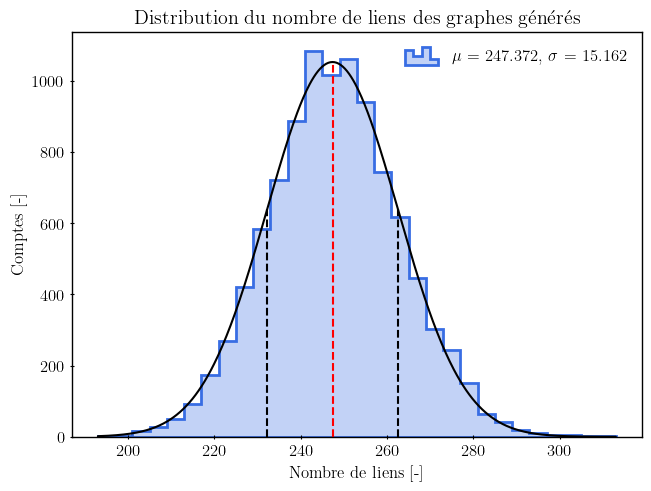

Moyenne th√©orique : 247.5
Moyenne empirique : 247.3717
√âcart relatif : 0.0518%

√âcart-type th√©orique : 15.333786225195654
√âcart-type empirique : 15.162016327322696
√âcart relatif : 1.1202%



In [6]:
def graph_generator(n: int=100, p: float=0.05) -> np.ndarray:
    """
    G√©n√®re un graphe al√©atoire de Erd≈ës-R√©nyi.

    Param√®tres
    ----------
    n : int, default=100
        Nombre de noeuds du graphe.
    p : float, default=0.05
        Probabilit√© d'avoir un lien entre deux noeuds.

    Retourne
    --------
    np.ndarray
        Matrice d'adjacence du graphe g√©n√©r√©, de taille (n,n). La matrice est sym√©trique.
    """
    prob = np.random.rand(n, n)
    adjacence1 = prob <= p
    np.fill_diagonal(adjacence1, False)  # Z√©ros sur la diagonale
    adjacence2 = np.triu(adjacence1) + np.tril(adjacence1.T)  # Pour sym√©triser la matrice d'adjacence
    return adjacence2  # Retourne un array o√π les True correspondent aux liens

def distribution_generator(
        size: int=10000, n: int=100, p: float=0.05
) -> tuple[tuple[float, float], tuple[float, float], np.ndarray]:
    """
    G√©n√®re une distribution de graphes al√©atoires et calcule la moyenne et l'√©cart-type du nombre de liens pour
    l'ensemble des graphes g√©n√©r√©s.

    Param√®tres
    ----------
    size : int, default=10000
        Nombre de graphes √† g√©n√©rer.
    n : int, default=100
        Nombre de noeuds du graphe.
    p : float, default=0.05
        Probabilit√© d'avoir un lien entre deux noeuds.

    Retourne
    --------
    tuple[tuple[float, float], tuple[float, float], np.ndarray]
        Moyenne, √©cart-type et distribution du nombre de liens pour l'ensemble des graphes g√©n√©r√©s. La moyenne et
        l'√©cart-type sont retourn√©s sous forme de tuples contenant la valeur empirique et la valeur th√©orique.
    """
    distribution = np.zeros(size)
    for i in range(size):
        distribution[i] = np.count_nonzero(graph_generator(n, p))/2 
        # La division par 2 est effectu√©e car chaque lien est compt√© deux fois dans la matrice d'adjacence
    moyenne = (np.mean(distribution), p*n*(n-1)/2)
    ecart_type = (np.std(distribution), (p*(1-p)*n*(n-1)/2)**0.5)
    return moyenne, ecart_type, distribution

mean, std, values = distribution_generator()
histogram = gl.Histogram(values, number_of_bins=30, normalize=False)
histogram.add_pdf()
fig = gl.Figure('Nombre de liens [-]', 'Comptes [-]', title="Distribution du nombre de liens des graphes g√©n√©r√©s")
fig.add_elements(histogram)
fig.show()

print(f"Moyenne th√©orique : {mean[1]}\nMoyenne empirique : {mean[0]}")
print(f"√âcart relatif : {np.abs(mean[0]/mean[1] - 1)*100:.4f}%\n")
print(f"√âcart-type th√©orique : {std[1]}\n√âcart-type empirique : {std[0]}")
print(f"√âcart relatif : {np.abs(std[0]/std[1] - 1)*100:.4f}%\n")


On constate que les valeurs th√©oriques s'accordent bien aux valeurs empiriques, avec de tr√®s petits √©carts relatifs. Ces r√©sultats peuvent √©galement √™tre v√©rifi√©s √† l'aide du module `NetworkX`:

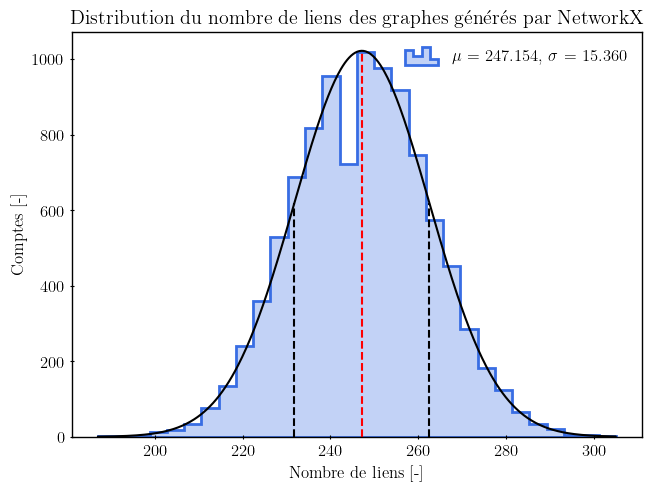

Moyenne th√©orique: 247.5
Moyenne empirique: 247.154
√âcart relatif : 0.1398%

√âcart-type th√©orique: 15.333786225195654
√âcart-type empirique: 15.360080859162169
√âcart relatif : 0.1715%



In [7]:
# V√©rification avec NetworkX

def distribution_generator_networkx(
        size: int=10000, n: int=100, p: float=0.05
) -> tuple[tuple[float, float], tuple[float, float], np.ndarray]:
    """
    G√©n√®re une distribution de graphes al√©atoires en utilisant NetworkX et calcule la moyenne et l'√©cart-type du
    nombre de liens pour l'ensemble des graphes g√©n√©r√©s.

    Param√®tres
    ----------
    size : int, default=10000
        Nombre de graphes √† g√©n√©rer.
    n : int, default=100
        Nombre de noeuds du graphe.
    p : float, default=0.05
        Probabilit√© d'avoir un lien entre deux noeuds.
    
    Retourne
    --------
    tuple[tuple[float, float], tuple[float, float], np.ndarray]
        Moyenne, √©cart-type et distribution du nombre de liens pour l'ensemble des graphes g√©n√©r√©s. La moyenne et
        l'√©cart-type sont retourn√©s sous forme de tuples contenant la valeur empirique et la valeur th√©orique.
    """
    distribution = np.zeros(size)
    for i in range(size):
        distribution[i] = nx.erdos_renyi_graph(n, p).number_of_edges()
    moyenne = (np.mean(distribution), p*n*(n-1)/2)
    ecart_type = (np.std(distribution), (p*(1-p)*n*(n-1)/2)**0.5)
    return moyenne, ecart_type, distribution

mean, std, values = distribution_generator_networkx()
histogram = gl.Histogram(values, number_of_bins=30, normalize=False)
histogram.add_pdf()
fig = gl.Figure('Nombre de liens [-]', 'Comptes [-]', 
                title="Distribution du nombre de liens des graphes g√©n√©r√©s par NetworkX")
fig.add_elements(histogram)
fig.show()

print(f'Moyenne th√©orique: {mean[1]}', f'Moyenne empirique: {mean[0]}', sep='\n')
print(f"√âcart relatif : {np.abs(mean[0]/mean[1] - 1)*100:.4f}%\n")
print(f'√âcart-type th√©orique: {std[1]}', f'√âcart-type empirique: {std[0]}', sep='\n')
print(f"√âcart relatif : {np.abs(std[0]/std[1] - 1)*100:.4f}%\n")

Encore une fois, les valeurs th√©oriques et empiriques sont tr√®s pr√®s les unes des autres, avec des √©carts relatifs tr√®s faibles.

Il aurait √©t√© int√©ressant de comparer ces deux m√©thodes plus directement, comme en utilisant le m√™me *seed*, pour voir si les r√©sultats concordent exactement. Cependant, √©tant donn√© que les m√©thodes de cr√©ation de graphe ne font pas utilisation des m√™mes fonctions, ni des m√™mes s√©quences d'appel, il est impossible de retomber exactement sur les m√™mes r√©sultats. Nous pouvons donc nous contenter de la comparaison des √©carts relatifs pour √©tablir la proximit√© avec les valeurs th√©oriques dans les deux cas.

### **d)** Impl√©mentez la simulation de la dynamique SIS sur r√©seau en utilisant le module `NetworkX`. Une fois votre algorithme fonctionnel, g√©n√©rez les courbes moyennes du nombre de n≈ìuds infect√©s et susceptibles en fonction du temps pour le r√©seau fourni (*reseau.adj*). Pour ouvrir ce r√©seau, utilisez la fonction `read_adjlist()` de `NetworkX`. Pour vos simulations, utilisez $\alpha = 0.05$, $\beta = 0.1$, une proportion initiale de n≈ìuds infect√©s de 10% et 100 pas de temps. Comparez les r√©sultats de la simulation avec le mod√®le √©tudi√© dans la premi√®re partie du travail et discutez.

Le code suivant impl√©mente d'abord la simulation du mod√®le SIS. Il implante ensuite une fonction permettant de calculer le nombre moyen de noeuds infect√©s et susceptibles √† chaque pas de temps pour un certain nombre de simulations. Les courbes obtenues lorsque ce code est appliqu√© au r√©seau fourni sont finalement pr√©sent√©es. Pour obtenir ces courbes, 100 simulations ont √©t√© moyenn√©es.

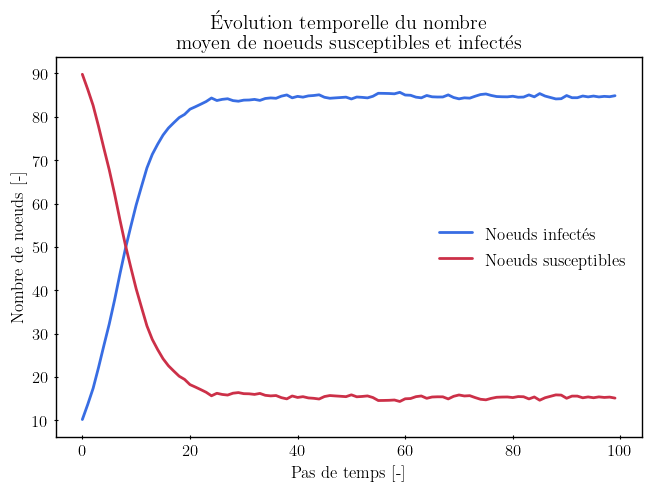

In [8]:
graph = nx.read_adjlist('devoirs/tp4/reseau.adj')

def sis_model(
        G: nx.classes.graph.Graph, alpha: float=0.05, beta: float=0.1, init: float=0.1, n: int=100
) -> tuple[np.ndarray, np.ndarray]:
    """
    Impl√©mente le mod√®le SIS (Susceptible-Infect√©-Susceptible) sur un graphe donn√©.

    Param√®tres
    ----------
    G : nx.classes.graph.Graph
        Graphe sur lequel le mod√®le est appliqu√©.
    alpha : float, default=0.05
        Taux de gu√©rison des noeuds infect√©s.
    beta : float, default=0.1
        Taux de contamination des noeuds susceptibles par les noeuds infect√©s voisins.
    init : float, default=0.1
        Proportion initiale de noeuds infect√©s dans le graphe.
    n : int, default=100
        Nombre de pas de temps pour l'√©volution du mod√®le.

    Retourne
    --------
    tuple[np.ndarray, np.ndarray]
        Deux arrays numpy contenant le nombre de noeuds infect√©s et susceptibles √† chaque pas de temps, de taille (n,).
    """
    # Initialisation des arrays contenant le nombre de noeuds infect√©s et susceptibles en fonction du temps
    infectes = np.zeros(n)
    susceptibles = np.zeros(n)

    # Initialisation des noeuds infect√©s
    labels = {}
    for x in range(len(G.nodes())):
        if np.random.rand() <= init:
            labels[f'{x}'] = 1 # Noeuds infect√©s
        else:
            labels[f'{x}'] = 0 # Noeuds susceptibles
    nx.set_node_attributes(G, labels, name='init')
    nx.set_node_attributes(G, labels, name='final')

    # √âvolution du graphe
    for t in range(n): # Boucle temporelle
        i, s = 0, 0
        for x in range(len(G.nodes())):
            if G.nodes[f'{x}']['init'] == 1:
                i += 1 # Incr√©mentation du nombre de noeuds infect√©s
                if np.random.rand() <= alpha:
                    G.nodes[f'{x}']['final'] = 0 # Gu√©rison des noeuds infect√©s
                else:
                    for k in G.neighbors(f'{x}'):
                        if G.nodes[f'{k}']['init'] != 1:
                            if np.random.rand() <= beta:
                                G.nodes[f'{k}']['final'] = 1 # Contamination des noeuds susceptibles voisins
            else:
                s += 1 # Incr√©mentation du nombre de noeuds suceptibles
        infectes[t], susceptibles[t] = i, s
        for x in range(len(G.nodes())):
            G.nodes[f'{x}']['init'] = G.nodes[f'{x}']['final'] # Application de la gu√©rison/contamination

    return infectes, susceptibles

def moyennes(G: nx.classes.graph.Graph, taille: int=100, intervalles: int=100) -> tuple[np.ndarray, np.ndarray]:
    """
    Calcule la moyenne du nombre de noeuds infect√©s et susceptibles sur plusieurs simulations du mod√®le SIS.

    Param√®tres
    ----------
    G : nx.classes.graph.Graph
        Graphe sur lequel le mod√®le est appliqu√©.
    taille : int, default=100
        Nombre de simulations √† effectuer.
    intervalles : int, default=100
        Nombre de pas de temps pour l'√©volution du mod√®le.
    
    Retourne
    --------
    tuple[np.ndarray, np.ndarray]
        Deux arrays numpy contenant la moyenne du nombre de noeuds infect√©s et susceptibles √† chaque pas de temps, de
        taille (intervalles,).
    """
    infectes, susceptibles = np.zeros(intervalles), np.zeros(intervalles)
    for k in range(taille):
        i, s = sis_model(G, n=intervalles)
        infectes += i
        susceptibles += s
    return infectes/taille, susceptibles/taille

i, s = moyennes(graph)
t = np.arange(len(i))

fig = gl.Figure('Pas de temps [-]', 'Nombre de noeuds [-]',
                title='√âvolution temporelle du nombre\nmoyen de noeuds susceptibles et infect√©s')
fig.add_elements(
    gl.Curve(t, i, label='Noeuds infect√©s'),
    gl.Curve(t, s, label='Noeuds susceptibles'),
)
fig.show()

En utilisant le mod√®le √©tudi√© dans la premi√®re partie du travail avec les param√®tres $i_0=0.1$, $R_0=\beta/\alpha=0.1/0.05=2$ et $\tau\in[0,50]$, nous obtenons:

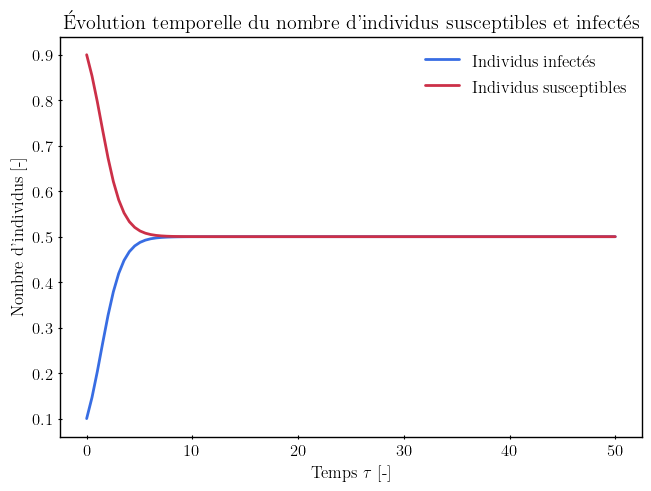

In [9]:
t = np.linspace(0, 50, 100)
i = sol_analytique(t, 0.1, 2)
s = np.ones_like(t)-i

fig = gl.Figure(r'Temps $\tau$ [-]', "Nombre d'individus [-]",
                title="√âvolution temporelle du nombre d'individus susceptibles et infect√©s")
fig.add_elements(
    gl.Curve(t, i, label='Individus infect√©s'),
    gl.Curve(t, s, label='Individus susceptibles'),
)
fig.show()


Ce mod√®le converge vers une solution stationnaire pour laquelle $i=s=0.5$. Il s'agit de la solution $i=\frac{R_0-1}{R_0}=\frac{2-1}{2}=0.5$ trouv√©e dans la premi√®re partie du travail.

Dans les deux mod√®les, le nombres d'individus infect√©s augmente rapidement avant de se stabiliser. La simulation sur r√©seau pr√©dit cependant un nombre plus grand d'individus infect√©s une fois l'√©quilibre atteint. Cette diff√©rence peut s'expliquer par la nature distincte des deux mod√®les. Le premier mod√®le utilis√© d√©pend du nombre de reproduction de base $R_0=\beta/\alpha$. Ce nombre correspond approximativement au nombre moyen de cas g√©n√©r√© par un individu infect√©. Le deuxi√®me mod√®le, quant √† lui, d√©pend des param√®tres de gu√©rison et d'infection $\alpha$ et $\beta$, de m√™me que de la structure du graphe utilis√©. La premi√®re diff√©rence rel√®ve donc de la d√©finition de $\alpha$
et $\beta$, qui ne sont pas n√©cessairement √©quivalents dans les deux mod√®les. La deuxi√®me diff√©rence rel√®ve du fait que le deuxi√®me mod√®le tient compte de la structure exacte des contacts entre les individus, ce que le premier mod√®le ne peut qu'approximer √† l'aide des param√®tres de contr√¥le.

De plus, il est difficile de comparer la vitesse d'augmentation du nombre d'individus infect√©s, car la premi√®re m√©thode fait intervenir un temps adimensionnel $\tau$ ind√©fini, tandis que la deuxi√®me m√©thode fait plut√¥t intervenir des pas de temps, eux aussi ind√©finis.



# R√©f√©rences

[1] ROY-POMERLEAU, Xavier. (2025). Processus al√©atoires et m√©thodes Monte Carlo.